# The project analyzes whether Fandango’s displayed movie ratings are accurate or inflated compared to other major review platforms (Rotten Tomatoes, Metacritic, and IMDb).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fandango = pd.read_csv("fandango_scrape.csv")  # Load Fandango movie ratings dataset
all_sites = pd.read_csv("all_sites_scores.csv")  # Load other movie ratings from multiple review sites

In [90]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [91]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
# Display info about data types and missing values in the fandango dataset
print(fandango.info(), '/n')  

# Show basic statistical summary for numeric columns (mean, std, min, max)
print(fandango.describe())    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB
None /n
            STARS      RATING         VOTES
count  504.000000  504.000000    504.000000
mean     3.558532    3.375794   1147.863095
std      1.563133    1.491223   3830.583136
min      0.000000    0.000000      0.000000
25%      3.500000    3.100000      3.000000
50%      4.000000    3.800000     18.500000
75%      4.500000    4.300000    189.750000
max      5.000000    5.000000  34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

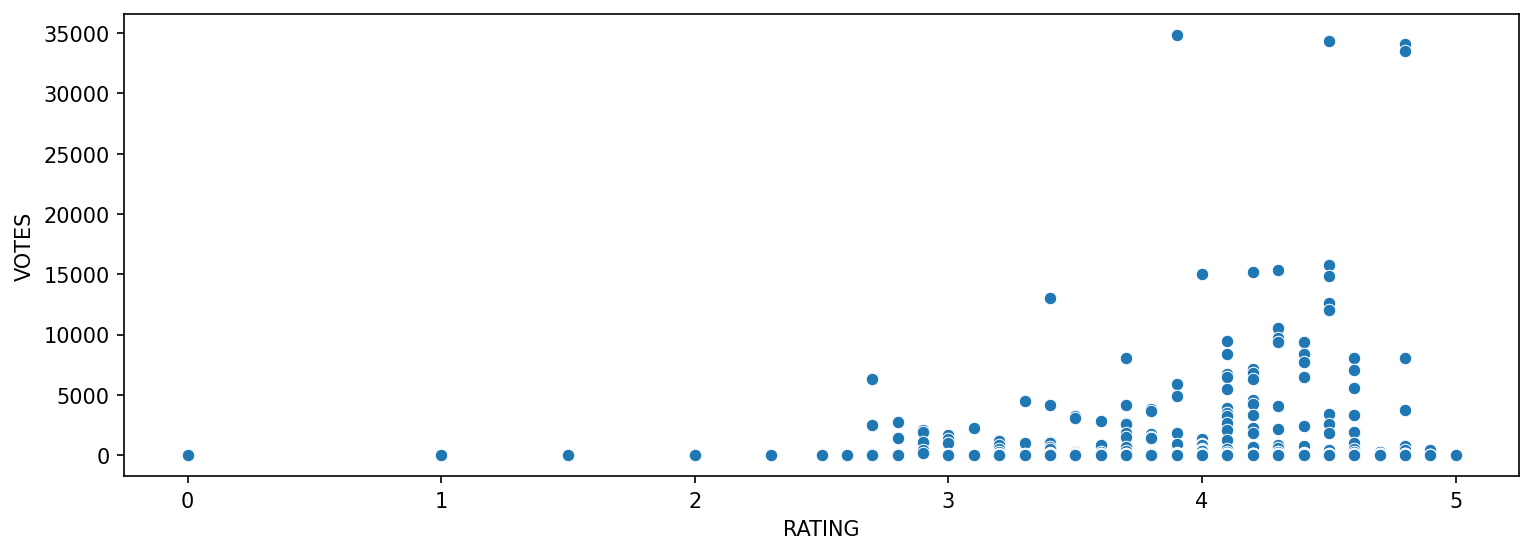

In [ ]:
# Plot number of votes vs displayed rating
# The relationship between rating and number of votes is directly proportional 
# higher-rated movies tend to get more votes.

plt.figure(figsize=(12,4), dpi=150)  
sns.scatterplot(data=fandango, x='RATING', y='VOTES')  


In [ ]:
# Compute pairwise correlation between numeric columns in the fandango dataset
fandango.corr(numeric_only=True)  


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [ ]:
# Extract the movie release year from the title
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', '')) 


# OR USE THIS
#def get_year(title):
#    return title.split('(')[-1].replace(')', '')

#fandango['YEAR'] = fandango['FILM'].apply(get_year)

In [16]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64


<Axes: xlabel='YEAR', ylabel='count'>

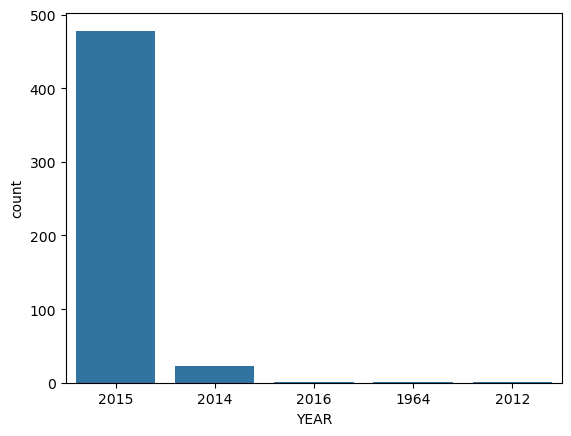

In [ ]:
# Plot the count of movies per year to visualize dataset distribution across time

print(fandango['YEAR'].value_counts())
sns.countplot(x='YEAR',data=fandango)

In [ ]:
# Display the 10 movies with the highest number of votes (most rated)
fandango.nlargest(10,'VOTES')

#OR: Alternative way using sort_values()
# fandango.sort_values(by='VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [ ]:
# Check which movies have zero votes (True = no votes)
print(fandango['VOTES'] ==0) 

# Use one of them
# No_Votes=fandango[fandango['VOTES'] ==0]
# len(No_Votes)


No_Votes=fandango['VOTES'] ==0
No_Votes.sum()


0      False
1      False
2      False
3      False
4      False
       ...  
499     True
500     True
501     True
502     True
503     True
Name: VOTES, Length: 504, dtype: bool


69

In [ ]:
# Filter the dataset to keep only movies with at least 1 fan vote
Fan_reviewed=fandango[fandango['VOTES'] >0]

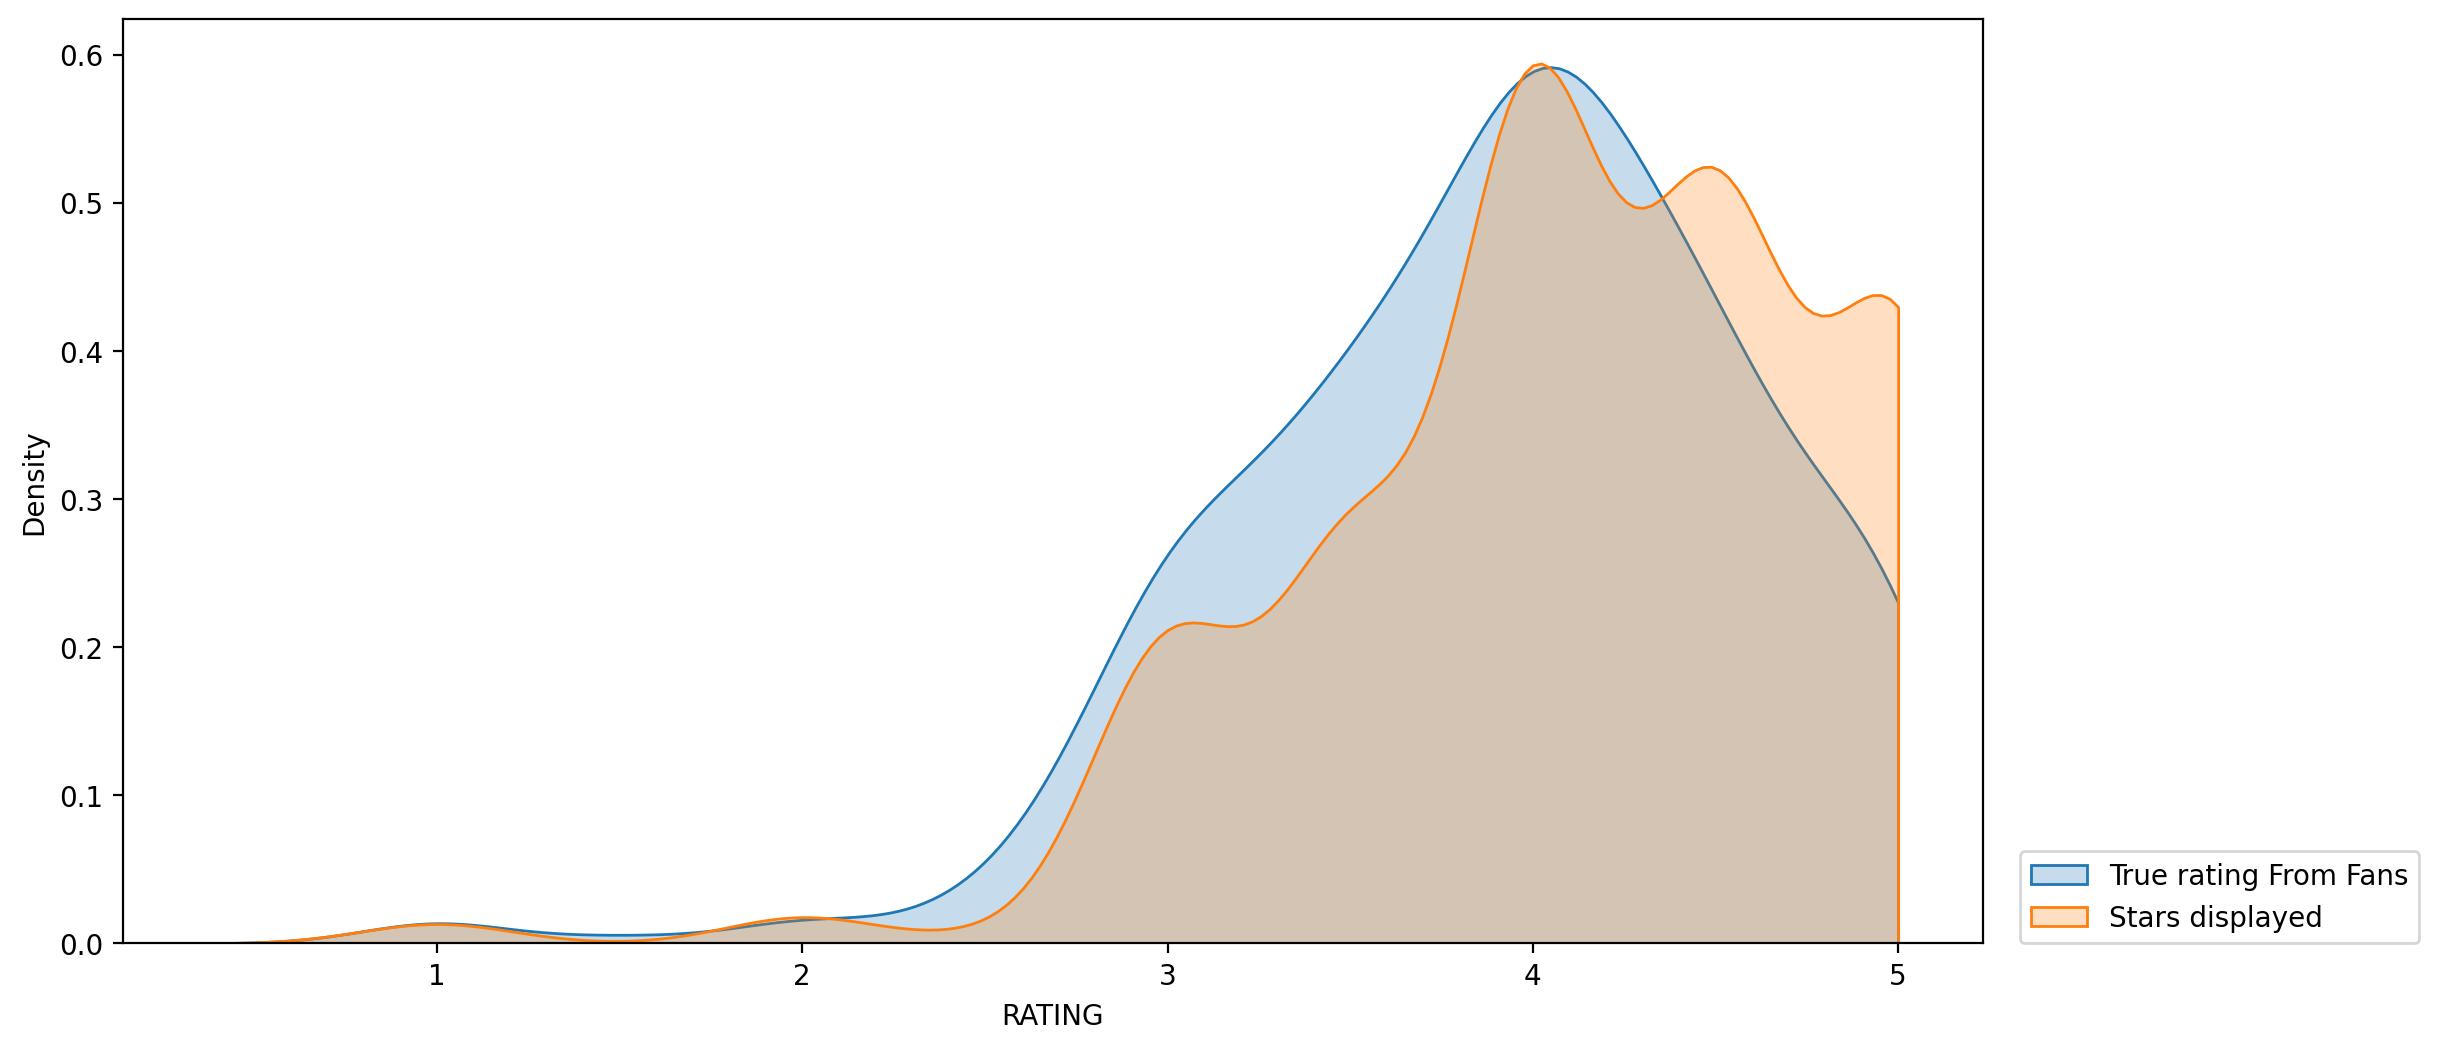

In [ ]:
# This plot compares the distribution of true fan ratings vs. Fandango's displayed star ratings
#  — showing if Fandango visually inflates scores (the STARS curve shifting to the right means higher displayed ratings than actual fan ratings).

plt.figure(figsize=(12,6),dpi=200)

sns.kdeplot(data=Fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True rating From Fans')
sns.kdeplot(data=Fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars displayed')

plt.legend(loc=(1.02,0))

In [ ]:
#new column of the different between STARS displayed versus true RATING
Fan_reviewed['Stars_Difference']=Fan_reviewed['STARS']-Fan_reviewed['RATING']


print(list(Fan_reviewed['Stars_Difference']))




[0.10000000000000009, 0.0, 0.20000000000000018, 0.20000000000000018, 0.0, 0.20000000000000018, 0.2999999999999998, 0.0, 0.5, 0.10000000000000009, 0.5, 0.5, 0.20000000000000018, 0.20000000000000018, 0.40000000000000036, 0.20000000000000018, 0.09999999999999964, 0.40000000000000036, 0.09999999999999964, 0.20000000000000018, 0.2999999999999998, 0.40000000000000036, 0.09999999999999964, 0.2999999999999998, 0.40000000000000036, 0.2999999999999998, 0.40000000000000036, 0.09999999999999964, 0.40000000000000036, 0.2999999999999998, 0.2999999999999998, 0.10000000000000009, 0.40000000000000036, 0.40000000000000036, 0.10000000000000009, 0.2999999999999998, 0.20000000000000018, 0.2999999999999998, 0.2999999999999998, 0.10000000000000009, 0.20000000000000018, 0.40000000000000036, 0.20000000000000018, 0.20000000000000018, 0.20000000000000018, 0.40000000000000036, 0.0, 0.40000000000000036, 0.2999999999999998, 0.40000000000000036, 0.5, 0.0, 0.3999999999999999, 0.20000000000000018, 0.40000000000000036,

C:\Users\Aorus-4070\AppData\Local\Temp\ipykernel_19016\2968368187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fan_reviewed['Stars_Difference']=Fan_reviewed['STARS']-Fan_reviewed['RATING']


In [79]:
Fan_reviewed['Stars_Difference']=Fan_reviewed['Stars_Difference'].round(2)

C:\Users\Aorus-4070\AppData\Local\Temp\ipykernel_19016\52333609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fan_reviewed['Stars_Difference']=Fan_reviewed['Stars_Difference'].round(2)


In [80]:
print(list(Fan_reviewed['Stars_Difference']))

[0.1, 0.0, 0.2, 0.2, 0.0, 0.2, 0.3, 0.0, 0.5, 0.1, 0.5, 0.5, 0.2, 0.2, 0.4, 0.2, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.1, 0.3, 0.4, 0.3, 0.4, 0.1, 0.4, 0.3, 0.3, 0.1, 0.4, 0.4, 0.1, 0.3, 0.2, 0.3, 0.3, 0.1, 0.2, 0.4, 0.2, 0.2, 0.2, 0.4, 0.0, 0.4, 0.3, 0.4, 0.5, 0.0, 0.4, 0.2, 0.4, 0.3, 0.3, 0.0, 0.3, 0.1, 0.4, 0.3, 0.2, 0.1, 0.4, 0.4, 0.1, 0.1, 0.3, 0.3, 0.5, 0.2, 0.0, 0.2, 0.3, 0.2, 0.2, 0.0, 0.0, 0.4, 0.3, 0.3, 0.1, 0.1, 0.4, 0.5, 0.1, 0.2, 0.1, 0.5, 0.5, 0.3, 0.4, 0.2, 0.5, 0.1, 0.2, 0.3, 0.1, 0.3, 0.2, 0.3, 0.4, 0.0, 0.4, 0.1, 0.0, 0.1, 0.2, 0.0, 0.5, 0.1, 0.0, 0.3, 0.3, 0.4, 0.3, 0.2, 0.5, 0.4, 0.2, 0.4, 0.5, 0.3, 0.1, 0.0, 0.1, 0.1, 0.2, 0.1, 0.2, 0.3, 0.1, 0.1, 0.3, 0.4, 0.0, 0.1, 0.4, 0.3, 0.2, 0.1, 0.1, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.4, 0.0, 0.4, 0.0, 0.1, 0.1, 0.1, 0.3, 0.3, 0.2, 0.1, 0.2, 0.5, 0.3, 0.1, 0.0, 0.1, 0.0, 0.3, 0.3, 0.5, 0.2, 0.0, 0.2, 0.2, 0.4, 0.4, 0.3, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.2, 0.1, 0.0, 0.1, 0.4, 0.3, 0.5, 0.5, 0.0, 0.4, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.0,

C:\Users\Aorus-4070\AppData\Local\Temp\ipykernel_19016\2560682133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stars_Difference',data=Fan_reviewed,palette='magma')


<Axes: xlabel='Stars_Difference', ylabel='count'>

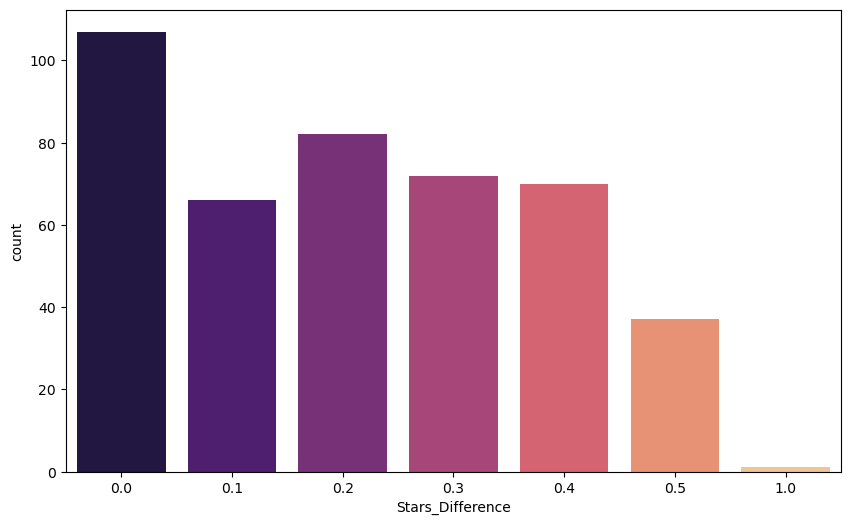

In [ ]:
# This count plot shows how many movies had each specific difference between displayed stars and true ratings
# revealing how often Fandango overrated (positive values) or underrated (negative values) movies.

plt.figure(figsize=(10,6))
sns.countplot(x='Stars_Difference',data=Fan_reviewed,palette='magma')


In [ ]:
# This filters and displays all movies where Fandango’s displayed stars were exactly 1 point higher than the true fan rating 
# highlighting the most overrated movies in the dataset.

Fan_reviewed[Fan_reviewed['Stars_Difference']==1]

,FILM,STARS,RATING,VOTES,YEAR,Stars_Difference
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


(0.0, 100.0)

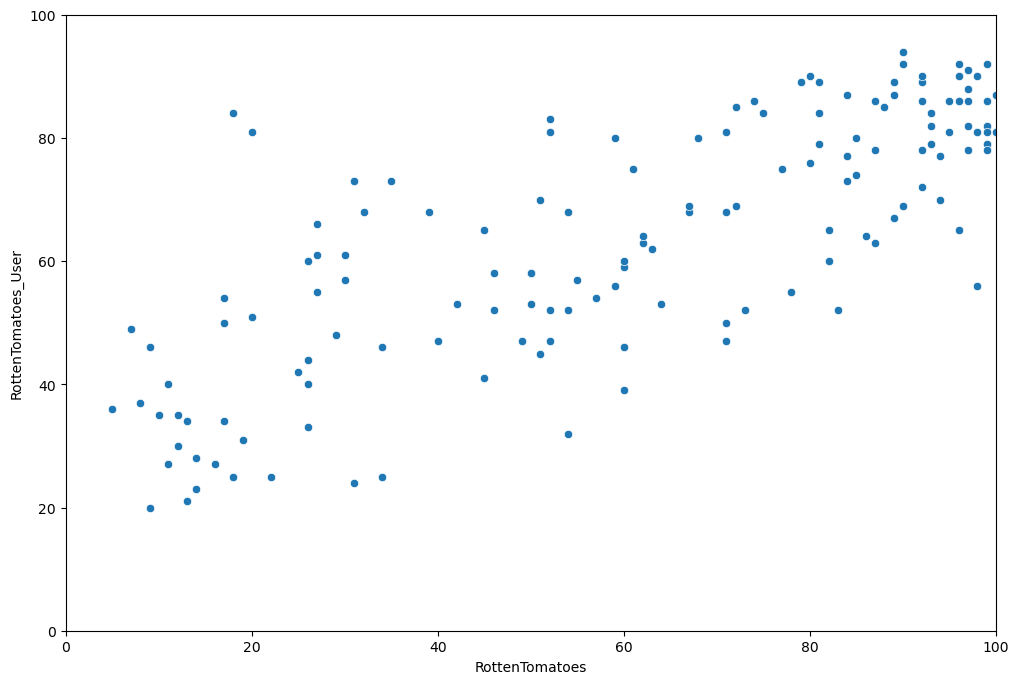

In [ ]:
# This scatter plot compares Rotten Tomatoes critic scores (x-axis) with audience scores (y-axis), showing how closely critics and users agree 
# points near the diagonal indicate agreement, while large gaps reveal differences in opinion.


plt.figure(figsize=(12,8))
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [ ]:
# Difference between Rotten Tomatoes and Rotten Tomatoes User reviews
all_sites['RottenDiff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

all_sites['RottenDiff']



0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RottenDiff, Length: 146, dtype: int64

In [ ]:
# This calculates the average absolute difference between Rotten Tomatoes critic and audience scores

all_sites['RottenDiff'].apply(abs).mean()

15.095890410958905

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


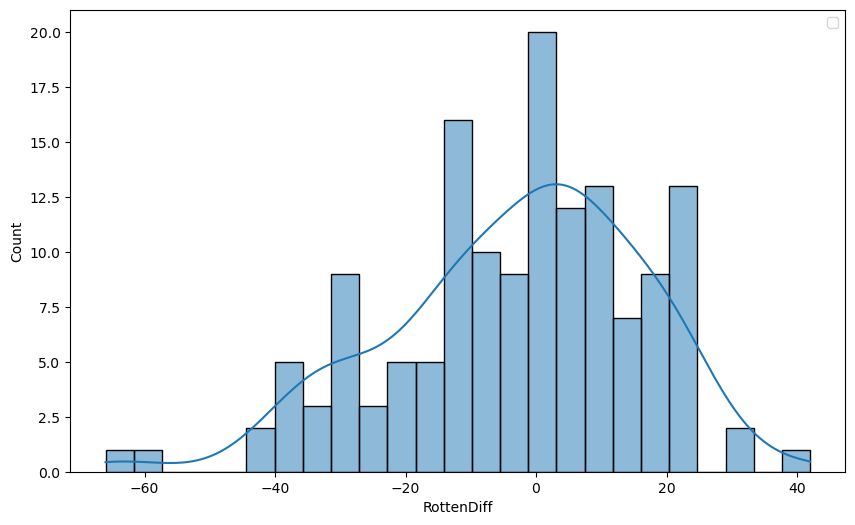

In [ ]:
# This histogram visualizes the distribution of differences between Rotten Tomatoes critic and audience scores 
# showing how often they agree (values near 0) or disagree (values farther from 0), with the KDE curve highlighting the overall trend.

plt.figure(figsize=(10,6))

sns.histplot(data=all_sites,x='RottenDiff',kde=True,bins=25)


plt.legend()

<Axes: xlabel='RottenDiff', ylabel='Count'>

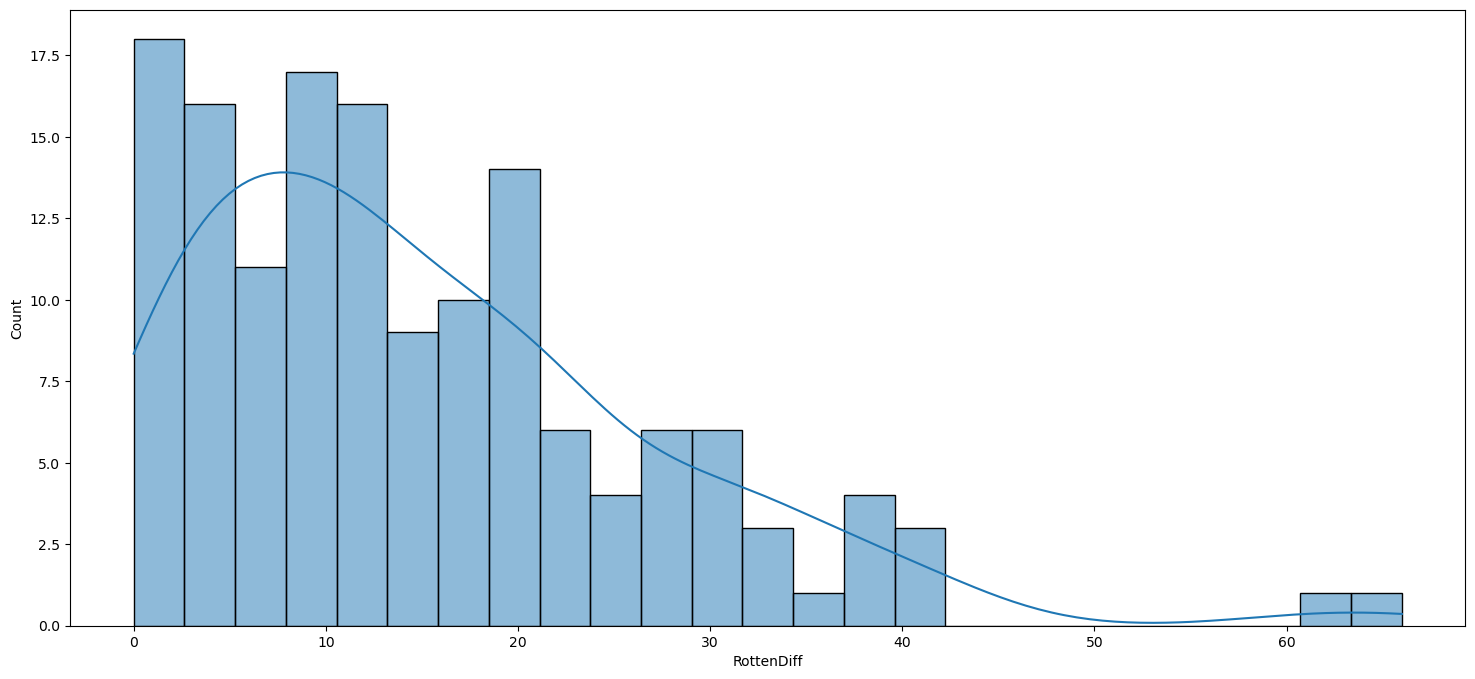

In [ ]:
# This histogram shows the absolute differences between Rotten Tomatoes critic and audience scores 
# illustrating how large the score gaps typically are, regardless of which side rated higher; smaller values mean stronger agreement.

plt.figure(figsize=(18,8))
sns.histplot(x=all_sites['RottenDiff'].apply(abs),kde=True,bins=25)

In [ ]:
# This displays the 5 movies with the smallest (most negative) RottenDiff values 
# meaning the audience rated them *much higher* than critics did, helping identify films that were disliked by critics but loved by viewers.

all_sites.nsmallest(5,'RottenDiff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [ ]:
# This shows the 5 movies with the largest (most positive) RottenDiff values 
# meaning critics rated them *much higher* than audiences did, highlighting films that critics praised but general viewers didn’t enjoy as much.

all_sites.nlargest(5,'RottenDiff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


In [102]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


(0.0, 100.0)

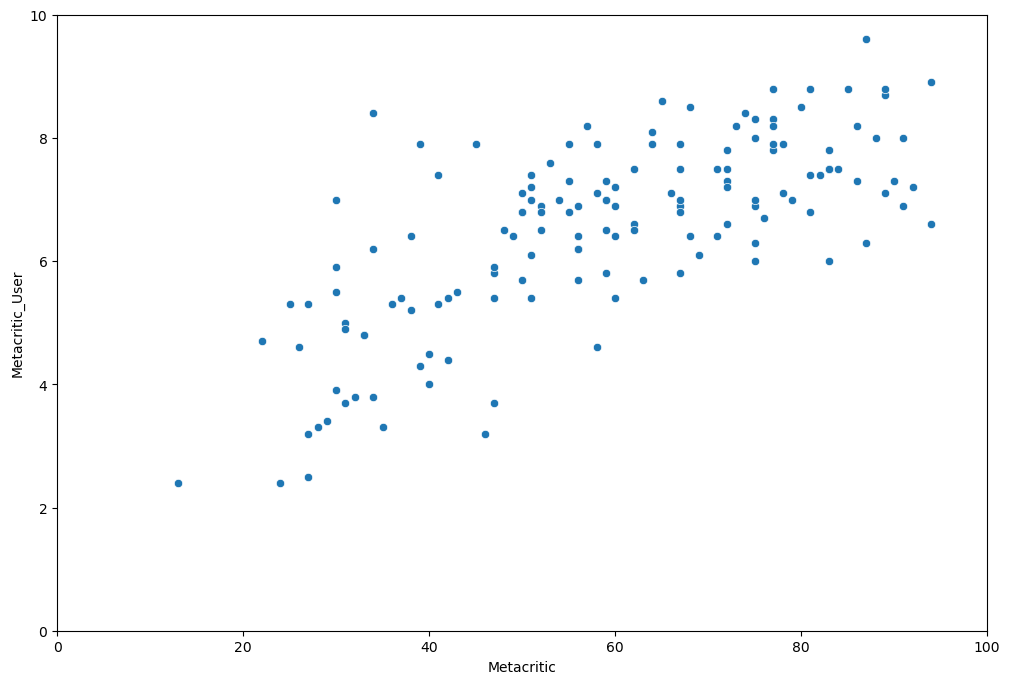

In [ ]:
# This scatter plot compares Metacritic critic scores (x-axis, out of 100) with Metacritic user scores (y-axis, out of 10) 
# showing how strongly critics and users align in their ratings; a clear upward trend means both groups generally agree on movie quality.

plt.figure(figsize=(12,8))
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

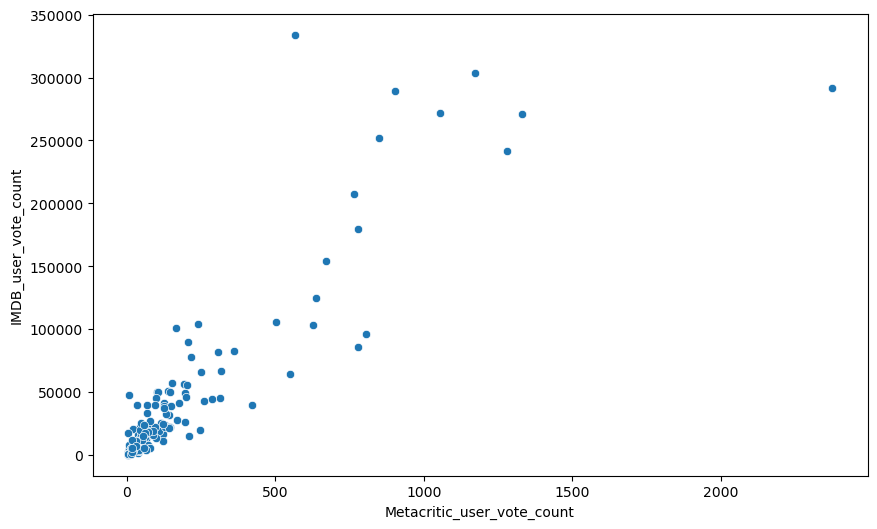

In [ ]:
# This scatter plot compares the number of user votes on Metacritic vs. IMDb
# showing how movie popularity differs across the two platforms; the upward trend suggests that movies with more Metacritic reviews also tend to receive more IMDb votes.

plt.figure(figsize=(10,6))
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [ ]:
# This identifies the movie with the highest number of IMDb user votes 
# used to detect potential outliers that could disproportionately affect correlations or visualizations due to extremely high popularity.

all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [ ]:
# This finds the movie with the most user votes on Metacritic 
# helping spot outliers or highly popular titles that might skew the overall data distribution in user vote comparisons.

all_sites.nlargest(1,'Metacritic_user_vote_count')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [ ]:
# This merges the Fandango and All Sites datasets into a single DataFrame using the film title as the key
# keeping only movies that exist in both datasets (inner join) so comparisons across rating platforms are consistent.

df=pd.merge(fandango,all_sites,on='FILM',how='inner')
df

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,9


In [ ]:
# These lines normalize all rating scores to the same 0–5 scale for easier comparison across platforms:
# The np.round(...,1) ensures all normalized ratings are rounded to one decimal place for cleaner analysis and plotting.

df['RT_Norm']=np.round(df['RottenTomatoes']/20,1)

df['RTU_Norm']=np.round(df['RottenTomatoes_User']/20,1)

df['Meta_Norm']=np.round(df['Metacritic']/20,1)

df['MetaU_Norm']=np.round(df['Metacritic_User']/2,1)

df['IMDB_Norm']=np.round(df['IMDB']/2,1)

In [110]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [ ]:
# This selects only the normalized rating columns (and Fandango’s own STARS and RATING) into a new DataFrame called norm_scores.
# It isolates comparable data across platforms, making it easier to analyze consistency between different rating sources.

norm_scores=df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


<Axes: ylabel='Density'>

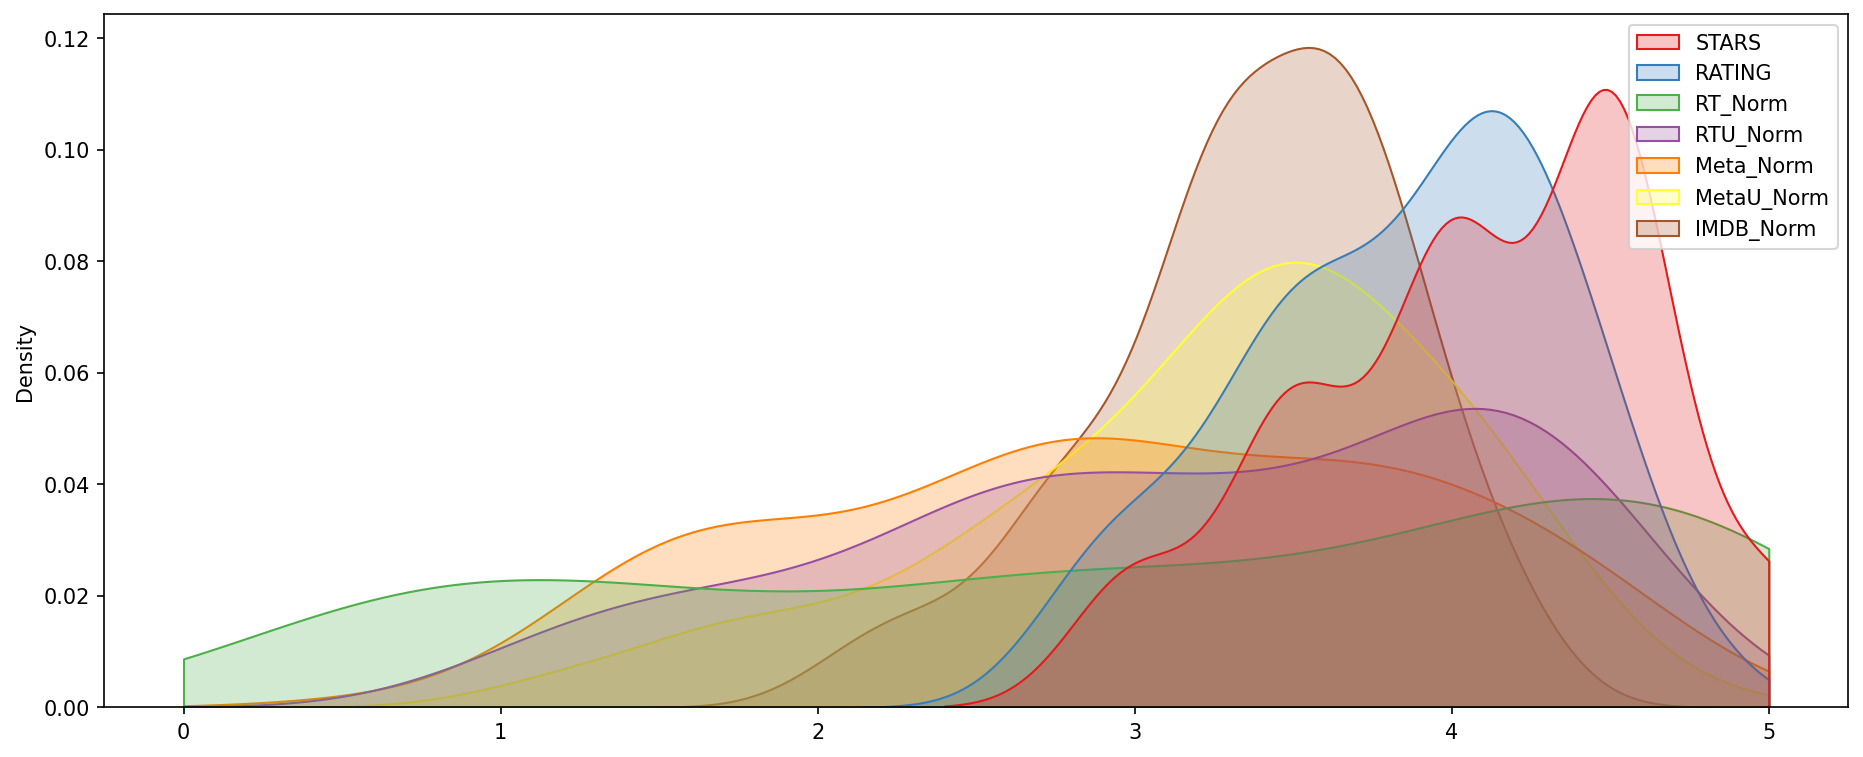

In [ ]:
# It visually compares how each platform’s rating distribution differs 
# showing whether some sites tend to rate movies higher or lower overall.
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Set1',ax=ax)


<Axes: ylabel='Density'>

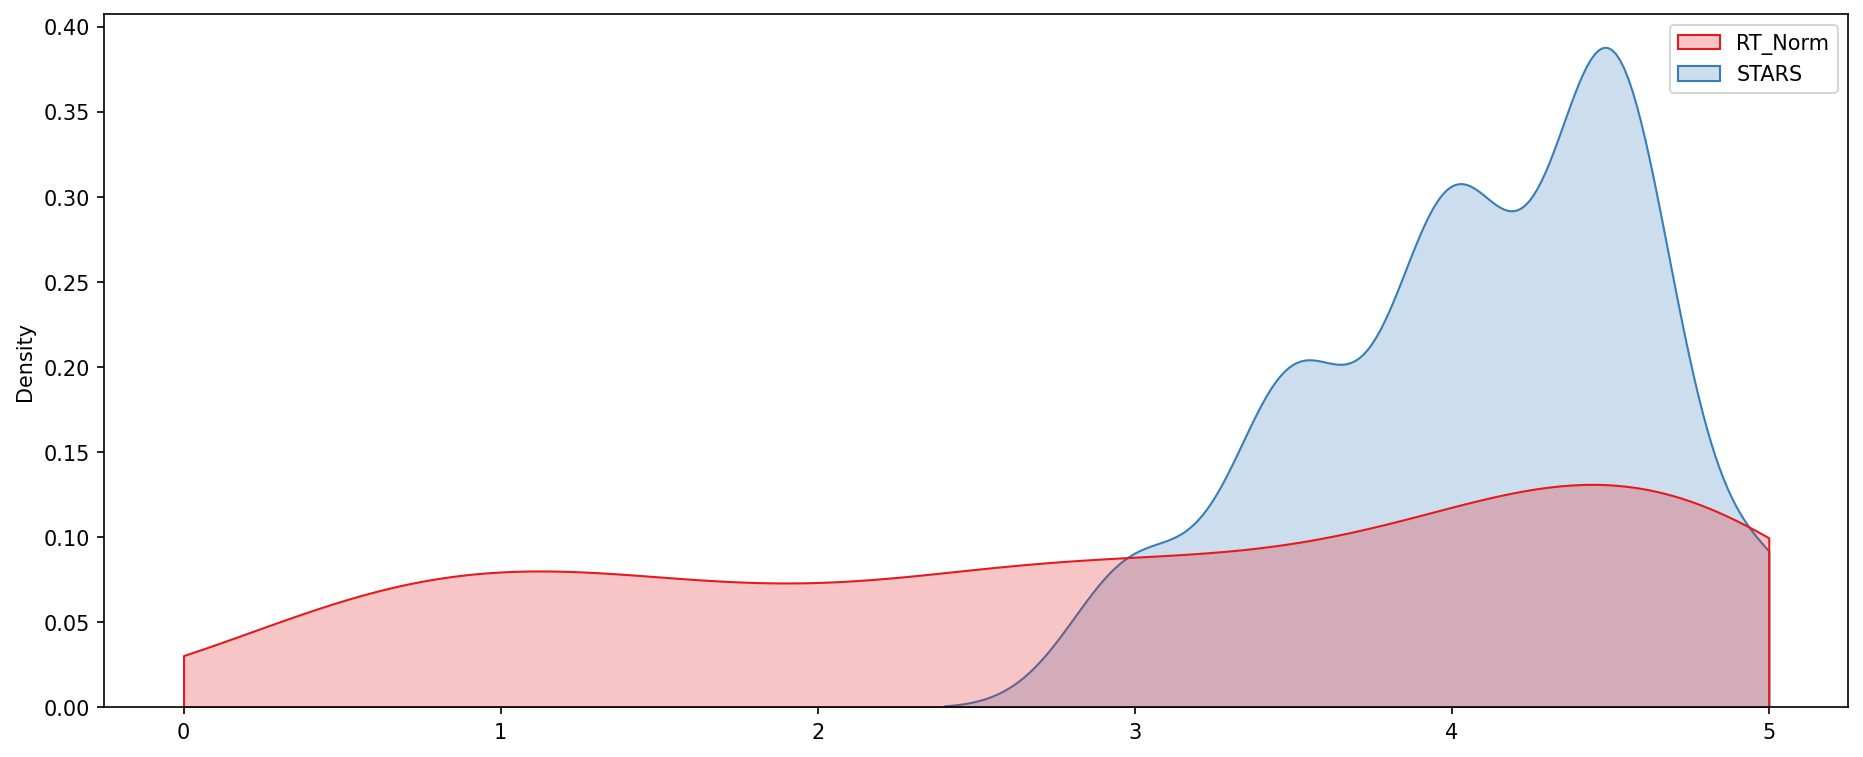

In [ ]:
# It highlights whether Fandango ratings are generally higher, lower, or similar to critic ratings 
# any consistent rightward shift of STARS indicates inflation by Fandango.

fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],fill=True,palette='Set1',ax=ax)

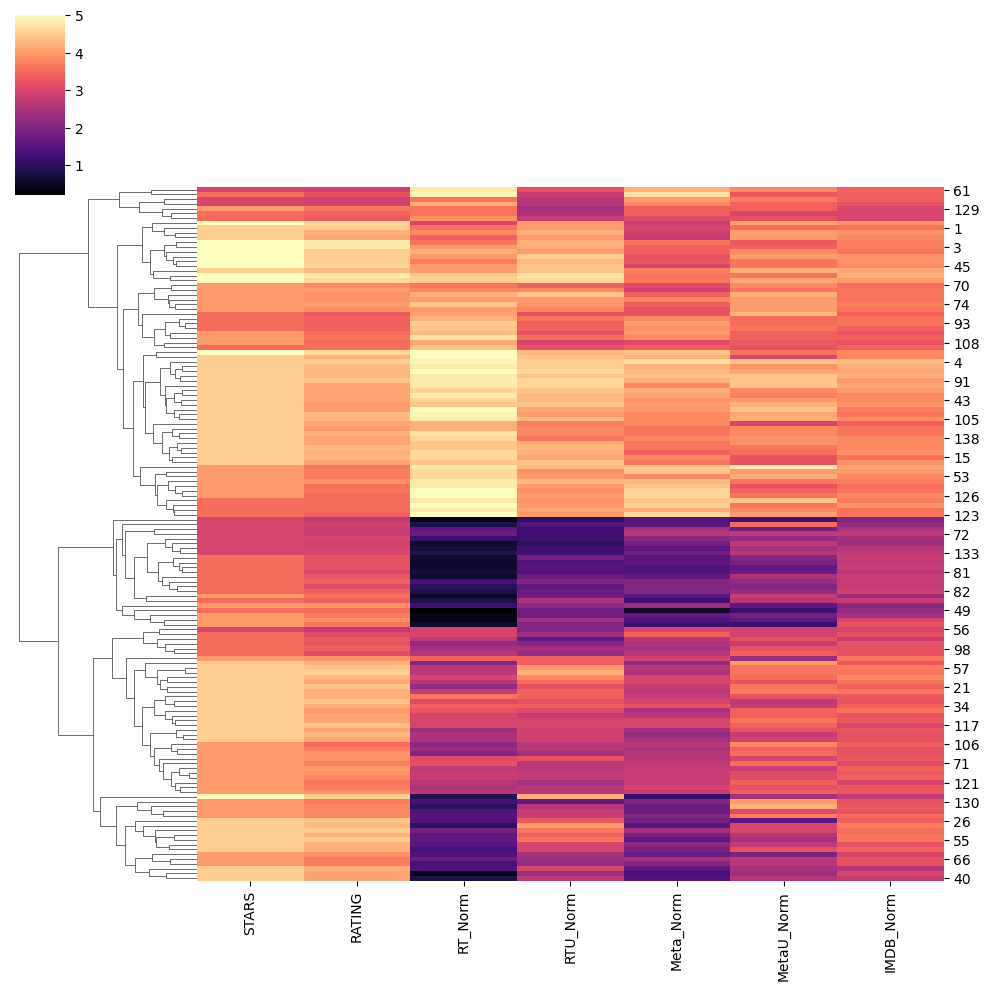

In [ ]:
# It visually groups movies with similar rating patterns across platforms, helping identify trends such as consistently overrated or underrated films.
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [ ]:
# This creates a new DataFrame, norm_films, that includes all normalized rating columns plus the film title.
# It keeps only the relevant data needed for movie-by-movie comparisons across platforms, allowing easier plotting or sorting by film.

norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm','FILM']]

In [ ]:
# This displays the 10 movies with the lowest Rotten Tomatoes critic scores (RT_Norm),
# helping identify the worst-rated films according to critics after normalization to the 0–5 scale.

norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

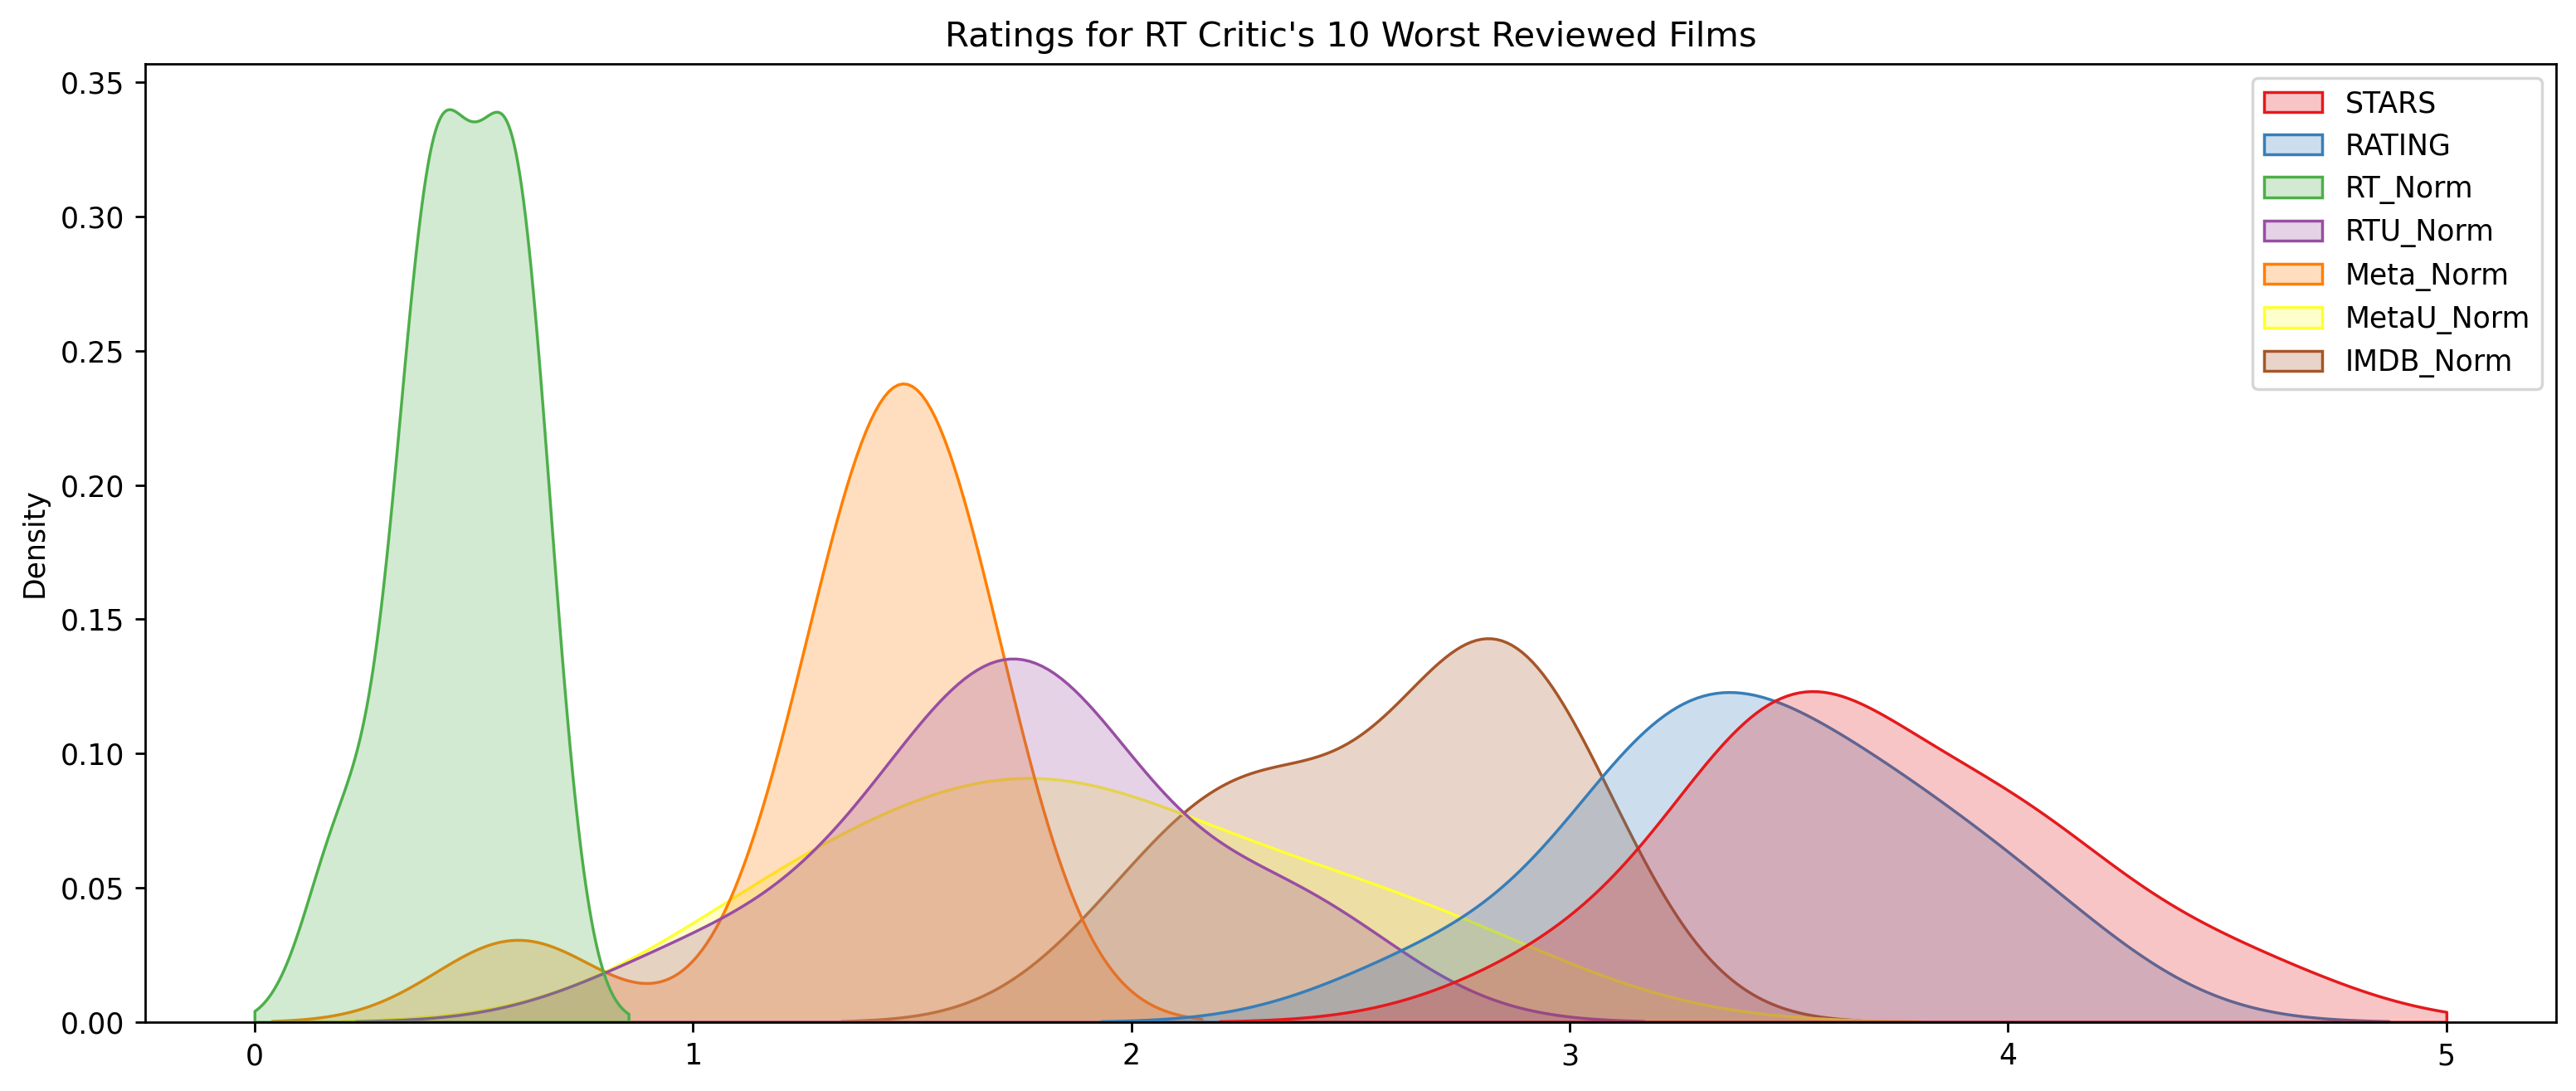

In [124]:
# This plots the rating distributions for the 10 lowest-rated movies according to Rotten Tomatoes critics.
# It compares how these same movies were rated across all platforms (Fandango, Metacritic, IMDb, etc.).
# If the KDE curves for other sites are shifted right of the RT_Norm curve, it shows those platforms rated the same “bad” movies more favorably.

plt.figure(figsize=(15,6),dpi=250)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")

In [ ]:
# Ratings breakdown for the movie *Taken 3 (2015)*:
# This shows that Fandango’s displayed rating (4.5) and user rating (4.1) are much higher than critic scores
# — Rotten Tomatoes (0.4) and Metacritic (1.3) — while user-based sites like IMDb (3.0) and Metacritic User (2.3)
# sit in between. It highlights how Fandango tends to inflate ratings compared to critics and even general audiences.

norm_films.iloc[25]

STARS                    4.5
RATING                   4.1
RT_Norm                  0.4
RTU_Norm                 2.3
Meta_Norm                1.3
MetaU_Norm               2.3
IMDB_Norm                3.0
FILM          Taken 3 (2015)
Name: 25, dtype: object